In [51]:
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
import numpy as np
from glob import glob
import cv2
import os

In [52]:
model = load_model('./store/model/model_v3.h5')

In [53]:
def load_test_image():
    images_labels = []
    images = glob("dataset/test_set/*/*.png")
    images.sort()
    for i in images:
        label = i[i.find(os.sep)+1: i.rfind(os.sep)]
        img = cv2.imread(i)
        test_image = cv2.resize(img, (64, 64))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        images_labels.append((test_image, label))
    return images_labels

In [54]:
images_labels = load_test_image()
images_labels

[(array([[[[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.],
           ...,
           [0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
  
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.],
           ...,
           [0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
  
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.],
           ...,
           [0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
  
          ...,
  
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.],
           ...,
           [0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
  
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.],
           ...,
           [0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]],
  
          [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.],
           ...,
           [0., 0., 0.],
           [0., 

In [55]:
images_labels = shuffle(shuffle(shuffle(shuffle(images_labels))))
images, labels = zip(*images_labels)

In [56]:
print("Length of images_labels", len(images_labels))

Length of images_labels 6713


In [58]:
pred_probabs = []
for i in images:
    p = model.predict(i)
    pred_probabs.append(p)

In [59]:
pred_labels = []
for pred_probab in pred_probabs:
	i = list(pred_probab[0]).index(max(pred_probab[0]))
	pred_labels.append(str(i))

In [60]:
len(labels)

6713

In [61]:
len(pred_probabs)

6713

In [62]:
pred_labels[0:5]

['24', '18', '3', '3', '12']

In [63]:
labels[0:5]

('24', '18', '3', '3', '12')

In [64]:
import sqlite3
def label_model():
    conn = sqlite3.connect("./store/database/gesture.db")
    cursor = conn.execute("SELECT g_id, g_name from gesture")
    labels = []
    for row in cursor:
        labels.append(row[1])
    return labels
text_lables = label_model()

In [65]:
clr = classification_report(labels, np.array(pred_labels), target_names=text_lables,output_dict=True)

In [66]:
import json
with open('./store/data.json', 'w', encoding='utf-8') as f:
    json.dump(clr, f, ensure_ascii=False, indent=4)

In [68]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig('./store/confusion_matrix.png')
    plt.show()

In [69]:
cm = confusion_matrix(labels, np.array(pred_labels))

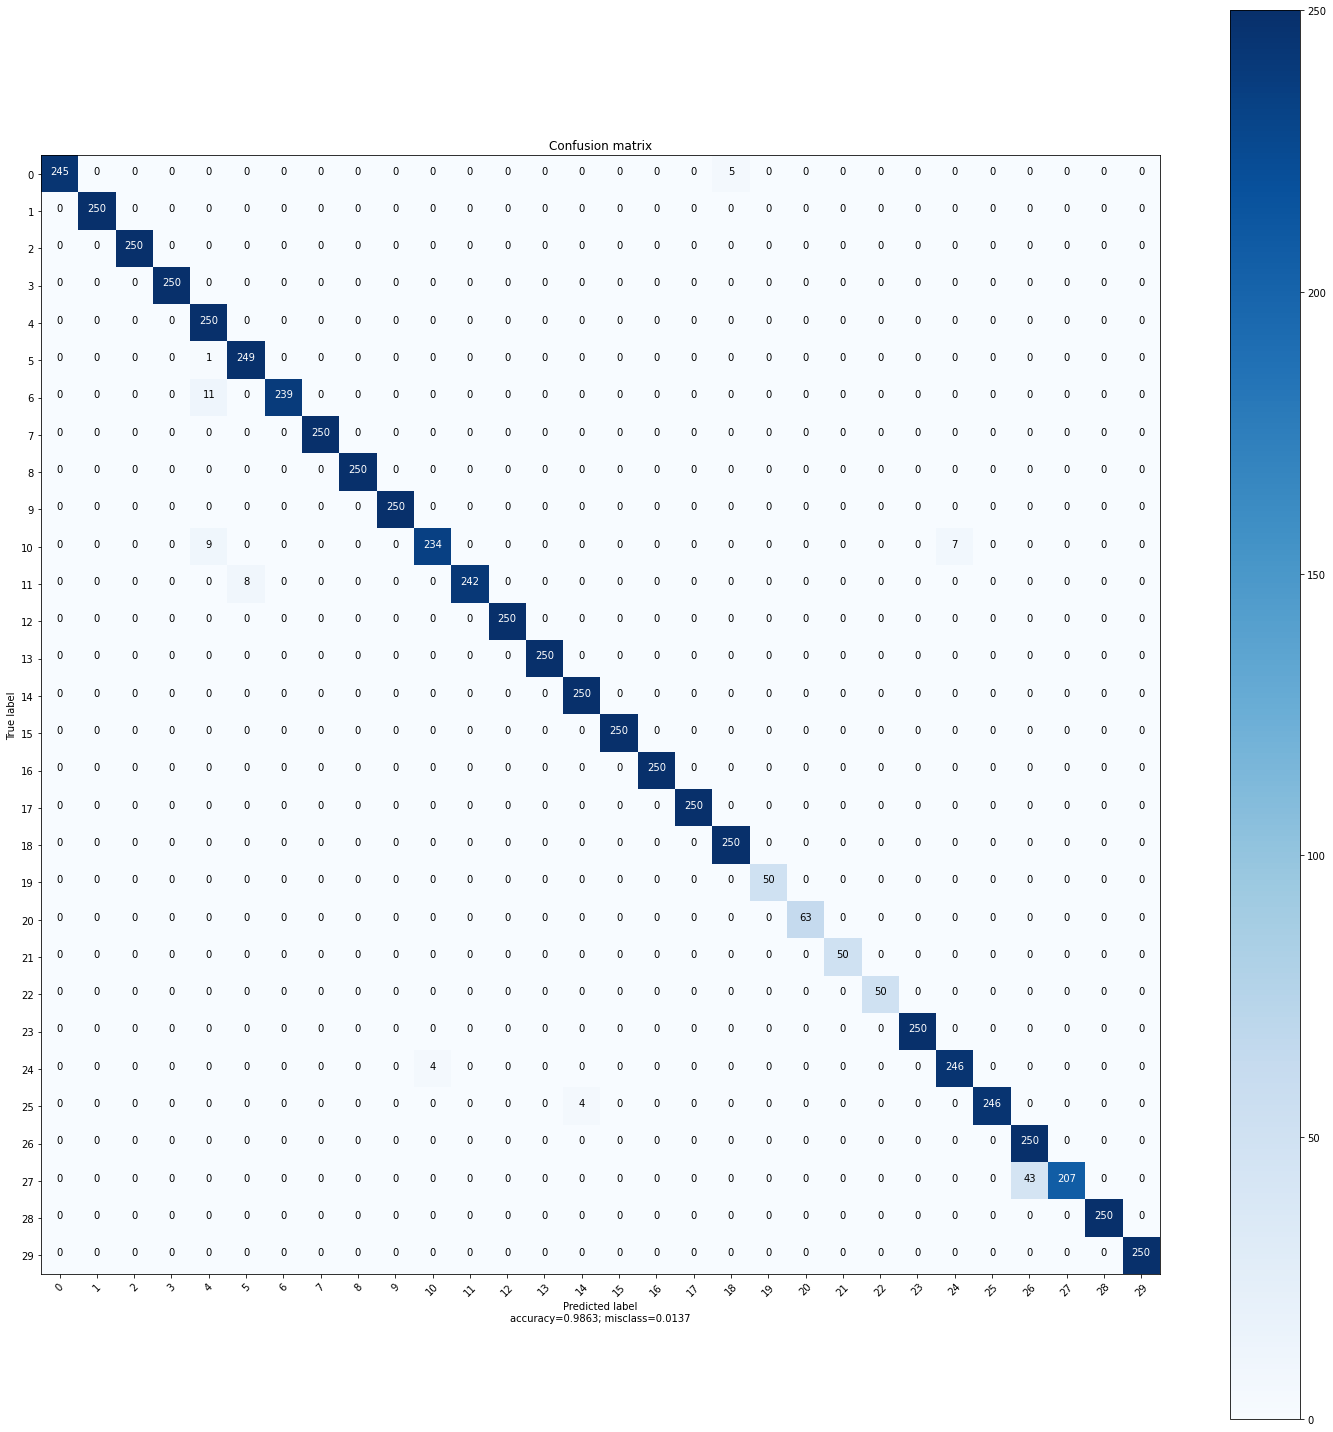

In [70]:
plot_confusion_matrix(cm, range(30), normalize=False)